In [105]:
import sys, numpy as np
from keras.datasets import mnist

import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# plt.imshow(x_train[0], cmap='gray')

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels), 10))

for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1

labels  = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))

for i,l in enumerate(y_test):
    test_labels[i][l] = 1

np.random.seed(1)

relu = lambda x: (x > 0) * x
relu2deriv = lambda x: x>0

alpha, interation, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)

weights_0_1 = 0.2 * np.random.random((pixels_per_image, hidden_size)) - 0.1
weight_1_2 = 0.2 * np.random.random((hidden_size, num_labels)) - 0.1


for j in range(interation): 
    error, correct_cnt = (0.0, 0)

    for i in range(len(images)):
        layer_0 = images[i: i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1, weight_1_2)
        error += np.sum((labels[i:i+1] - layer_2) ** 2)

        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i: i+1]))

        layer_2_delta = (labels[i: i+1] - layer_2)

        layer_1_delta = layer_2_delta.dot(weight_1_2.T) * relu2deriv(layer_1)

        weight_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r" + \
                     " I:" + str(j)+ \
                     " Error:" + str(error/float(len(images)))[0:5] +\
                     " Correct"+ str(correct_cnt/float(len(images)))
                     )



 I:349 Error:0.260 Correct0.883

Predicted digit: 0
Confidence: 0.4971
Actual digit: 0


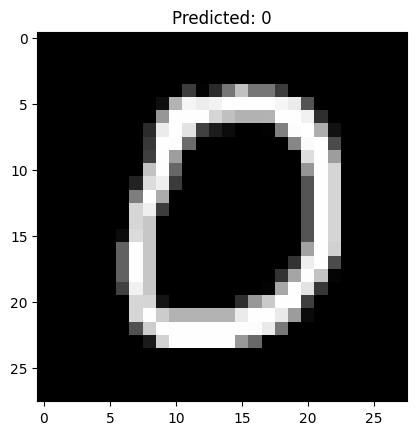

In [106]:
def predict_digit(image, weights_0_1, weight_1_2):
    if image.shape == (28, 28):
        image = image.reshape(1, 784)
    if image.max() > 1:
        image = image / 255.0
    layer_0 = image
    layer_1 = relu(np.dot(layer_0, weights_0_1))
    layer_2 = np.dot(layer_1, weight_1_2)
    
    # Get prediction and confidence
    predicted_digit = np.argmax(layer_2)
    confidence = layer_2[0][predicted_digit]
    
    return predicted_digit, confidence

test_image = x_test[10]
predicted_digit, confidence = predict_digit(test_image, weights_0_1, weight_1_2)

print(f"Predicted digit: {predicted_digit}")
print(f"Confidence: {confidence:.4f}")
print(f"Actual digit: {y_test[10]}")

plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted: {predicted_digit}')
plt.show()